<a href="https://colab.research.google.com/github/rdemarqui/studies/blob/master/Probability_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Calibration

## Introduction

### Types of Prediction

* **"Hard" Prediction**: Predict the *exact* value of y given x.
* **"Ranking" Prediction**: (binary classification) Provide a *score* for x, where higher score means it's more likely that y is true.
* **"Probabilistic" Prediction**: predict the *probabilities* of y given x.

### What is Calibration?

* **Calibration**:
  * Adjusting the predictions of a model so that they are **probabilistically meaningful**.
* **Probabilistically Meaningful**:
  * When predicting probability 0.3, in the long run, 30% of those events occur.

## Implementation

In [ ]:
!pip install ml_insights
!pip betacal

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = os.getcwd()

### MIMIC ICU Data

In [ ]:
# Downloading dataset from github
!wget https://github.com/rdemarqui/studies/raw/master/dataset/lab_vital_icu_table.zip

In [13]:
lab_aug_df = pd.read_csv(os.path.join(path, 'lab_vital_icu_table.zip'),
                  sep=',', compression='zip')
lab_aug_df.head()

,subject_id,hadm_id,icustay_id,aniongap_min,aniongap_max,albumin_min,albumin_max,bicarbonate_min,bicarbonate_max,bilirubin_min,...,meanbp_mean,resprate_min,resprate_max,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean
0,9,150750,220597,13.0,13.0,NaN,NaN,26.0,30.0,0.4,...,98.850000,14.0,19.0,14.369565,35.500001,37.888887,37.049383,95.0,100.0,97.650000
1,13,143045,263738,10.0,14.0,3.9,3.9,23.0,24.0,0.4,...,93.772727,11.0,25.0,15.320000,35.944443,37.400002,36.653534,94.0,100.0,97.700000
2,20,157681,264490,12.0,12.0,NaN,NaN,21.0,21.0,NaN,...,75.058333,10.0,27.0,15.404762,35.900002,37.299999,36.545714,95.0,100.0,98.435897
3,28,162569,225559,13.0,13.0,NaN,NaN,23.0,23.0,NaN,...,69.133333,9.0,32.0,16.677419,35.900002,37.700001,37.033333,92.0,100.0,96.419355
4,37,188670,213503,9.0,10.0,NaN,NaN,33.0,35.0,NaN,...,73.297610,15.0,30.0,22.241379,36.833335,38.055556,37.333334,89.0,99.0,96.533333


In [19]:
def null_chart(dataframe):
  """
    Function to generate a chart with percentages of null values per feature
  """
  print(f'Total null values: {dataframe.isnull().sum().sum()}')
  null_cols = dataframe.columns[dataframe.isnull().any()]
  dataframe[null_cols].isnull().mean().plot.bar(figsize=(25,6))
  plt.ylabel('Null values percent')
  plt.xlabel('Features')
  plt.title('Quantifying null values');

Total null values: 540340


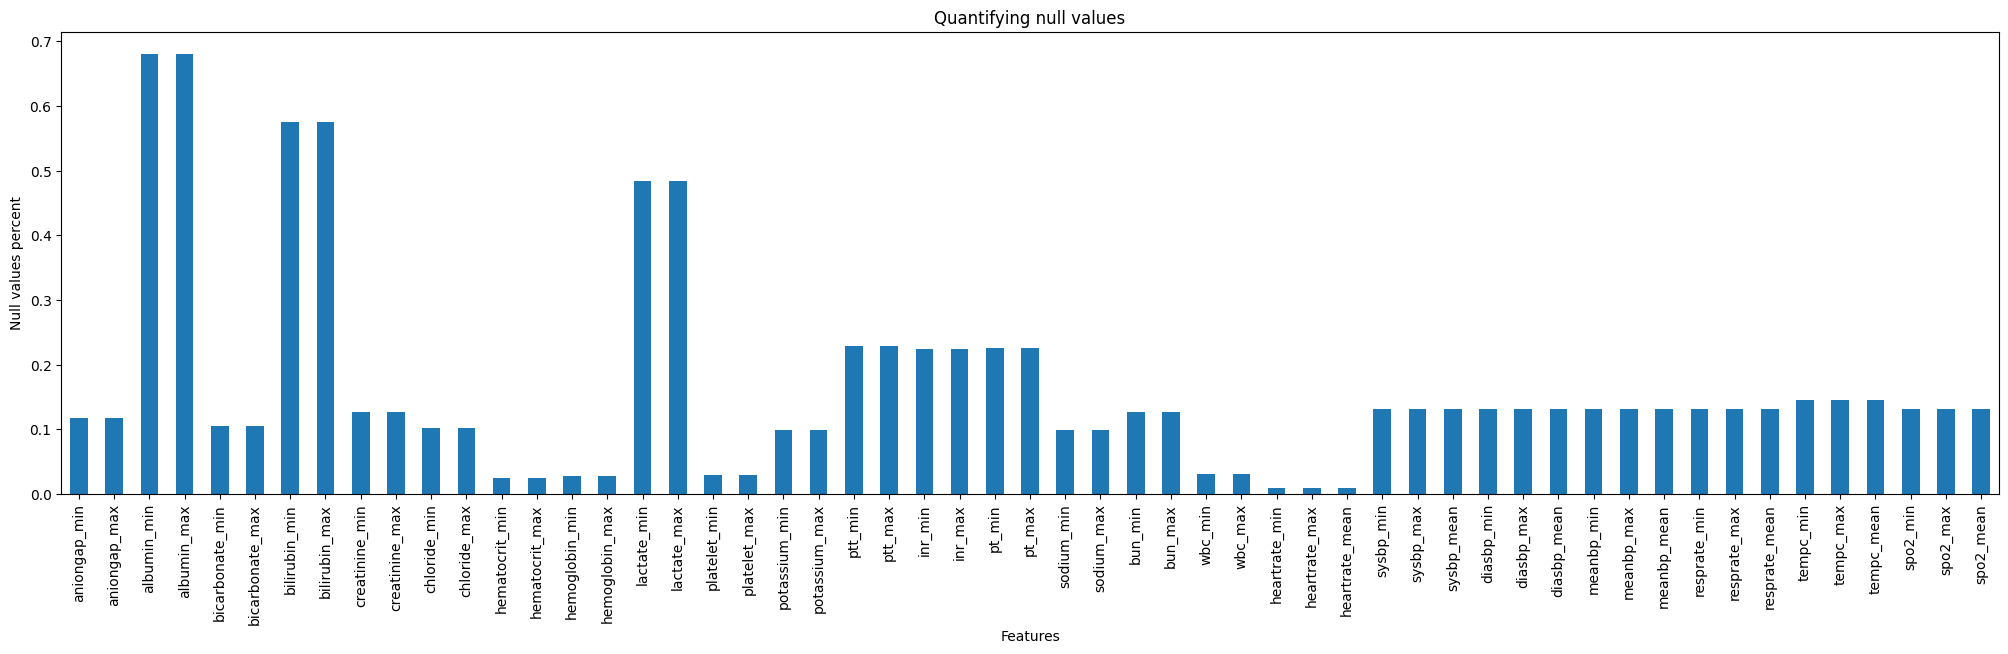

In [20]:
null_chart(lab_aug_df)

In [ ]:
# Impute the median for in each column to replace NA's
for i in range(len(lab_aug_df.columns)):
    if lab_aug_df.iloc[:,i].dtype!='O':
        lab_aug_df.iloc[:,i].fillna(lab_aug_df.iloc[:,i].median(),inplace=True)

## References

* Probability Calibration Workshop: https://www.youtube.com/playlist?list=PLeVfk5xTWHYBw22D52etymvcpxey4QFIk
* Probability Calibration - Data Science Concepts: https://www.youtube.com/watch?v=AunotauS5yI
* Model Calibration - is your model ready for the real world? https://www.youtube.com/watch?v=FkfDlOnQVvQ
* https://www.youtube.com/watch?v=XGlUFE8UMB4
* https://www.youtube.com/watch?v=5zbV24vyO44
* https://machinelearningmastery.com/probability-calibration-for-imbalanced-classification/